In [30]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import inspect
from sqlalchemy import create_engine, text
import ast  # Para convertir texto en listas de Python

In [33]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from word2number import w2n

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [36]:
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [37]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    colores = plt.cm.Pastel1.colors  # paleta de colores claritos
    plt.pie(
        valores, 
        labels=valores.index, 
        autopct="%1.1f%%", 
        startangle=90, 
        colors=colores[:len(valores)]  # asegura que se usan solo los necesarios
    )
    plt.title(titulo)
    plt.show()

In [38]:
#Subo dos niveles para que pueda leer el csv
df = pd.read_csv("../../data/optimizacion_talento.csv", index_col=0)

print(df.shape)
df.head()

(1614, 28)


,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,No,No Travel,Research & Development,6,3,Other,1,1,Female,3,5,Research Director,3,Unknown,7,No,3,3,0,5,3,20,15,15,1972,195370.00,Sí
1,52,No,No Travel,Sales,1,4,Life Sciences,2,3,Female,2,5,Manager,3,Unknown,0,Unknown,3,1,1,5,3,33,11,9,1971,199990.00,Sí
2,42,No,Travel Rarely,Sales,4,2,Technical Degree,3,3,Female,3,5,Manager,4,Married,1,No,3,4,0,3,3,22,11,15,1981,192320.00,Sí
3,47,No,Travel Rarely,Research & Development,2,4,Medical,4,1,Male,3,4,Research Director,3,Married,3,Unknown,3,2,2,2,3,20,5,6,1976,171690.00,No
4,46,No,No Travel,Sales,3,3,Technical Degree,5,1,Male,4,4,Sales Executive,1,Divorced,2,No,3,4,1,5,3,19,2,8,1977,153407.04,No


In [39]:
# eliminar filas donde overtime es "unknown"
df = df[df['overtime'] != 'Unknown']

In [40]:
df.head()

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,51,No,No Travel,Research & Development,6,3,Other,1,1,Female,3,5,Research Director,3,Unknown,7,No,3,3,0,5,3,20,15,15,1972,195370.00,Sí
2,42,No,Travel Rarely,Sales,4,2,Technical Degree,3,3,Female,3,5,Manager,4,Married,1,No,3,4,0,3,3,22,11,15,1981,192320.00,Sí
4,46,No,No Travel,Sales,3,3,Technical Degree,5,1,Male,4,4,Sales Executive,1,Divorced,2,No,3,4,1,5,3,19,2,8,1977,153407.04,No
5,48,No,No Travel,Sales,22,3,Medical,6,4,Male,3,4,Manager,4,Unknown,3,No,3,2,1,3,3,22,4,7,1975,171740.04,Sí
7,42,No,Travel Rarely,Sales,1,1,Other,8,2,Female,3,2,Sales Executive,3,Married,1,No,4,3,0,3,3,20,11,6,1981,53914.11,No


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 938 entries, 0 to 1612
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       938 non-null    int64  
 1   attrition                 938 non-null    object 
 2   businesstravel            938 non-null    object 
 3   department                938 non-null    object 
 4   distancefromhome          938 non-null    int64  
 5   education                 938 non-null    int64  
 6   educationfield            938 non-null    object 
 7   employeenumber            938 non-null    int64  
 8   environmentsatisfaction   938 non-null    int64  
 9   gender                    938 non-null    object 
 10  jobinvolvement            938 non-null    int64  
 11  joblevel                  938 non-null    int64  
 12  jobrole                   938 non-null    object 
 13  jobsatisfaction           938 non-null    int64  
 14  maritalstatus 

In [42]:
print(df.shape)

(938, 28)


Obtenemos la matriz de correlación para poder ver las relaciones entre las variables

In [43]:
# Matriz de correlación
num_vars = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[num_vars].corr()

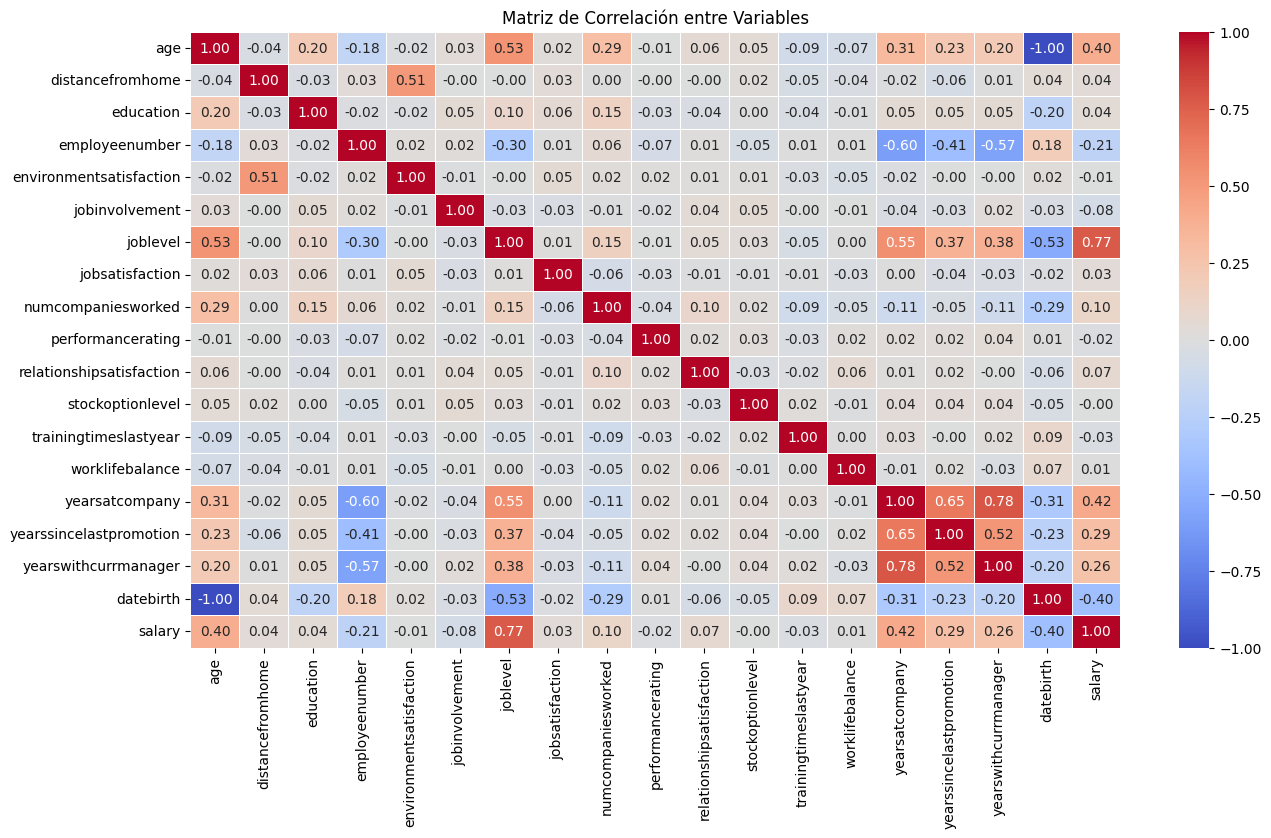

In [44]:
# Visualiza la matriz de correlación utilizando seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

In [45]:
palettes = sns.color_palette("coolwarm", 2)
palettes4 = sns.color_palette("coolwarm", 4)

In [46]:
sns.set_palette("Pastel1")   # paleta de colores clara

In [47]:
mascara = df["attrition"]=="Yes"
media_edad_salidas = df[mascara]
media_edad_salidas

,age,attrition,businesstravel,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,numcompaniesworked,overtime,performancerating,relationshipsatisfaction,stockoptionlevel,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
13,41,Yes,Travel Rarely,Research & Development,12,3,Other,14,2,Male,3,5,Research Director,3,Married,1,No,3,4,0,0,3,22,15,8,1982,195450.00,No
16,58,Yes,Travel Rarely,Research & Development,2,4,Other,17,4,Female,3,5,Research Director,2,Single,7,Yes,3,4,0,2,3,31,13,8,1965,192460.00,No
26,52,Yes,No Travel,Sales,2,1,Other,27,1,Male,1,5,Manager,4,Married,1,No,3,4,1,3,3,32,6,9,1971,198450.00,Sí
98,45,Yes,No Travel,Sales,13,3,Marketing,99,1,Male,1,5,Manager,2,Unknown,2,Yes,3,1,0,2,3,24,1,11,1978,191324.62,Sí
158,34,Yes,Travel Rarely,Sales,24,4,Other,159,1,Male,2,2,Sales Executive,2,Single,0,Yes,4,3,0,2,4,15,10,10,1989,53914.11,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,25,Yes,Travel Rarely,Research & Development,3,3,Medical,1540,1,Female,3,1,Laboratory Technician,1,Married,5,No,3,3,1,5,3,2,0,2,1998,28111.13,Sí
1559,41,Yes,No Travel,Sales,4,3,Other,1560,1,Female,3,2,Sales Executive,2,Unknown,1,No,3,3,0,5,3,8,7,7,1982,53914.11,Sí
1569,26,Yes,Travel Frequently,Human Resources,17,4,Life Sciences,1570,2,Male,3,1,Human Resources,3,Unknown,0,Yes,3,2,1,2,3,7,1,0,1997,27410.00,Sí
1588,28,Yes,No Travel,Research & Development,1,2,Other,1589,1,Male,1,1,Research Scientist,2,Unknown,7,Yes,3,4,0,4,3,7,3,7,1995,22160.00,Sí


In [48]:
media_edad_salidas.describe().T

,count,mean,std,min,25%,50%,75%,max
age,151.0,33.278146,9.542298,18.0,26.50,31.00,40.00,58.0
distancefromhome,151.0,12.072848,10.194181,1.0,3.00,9.00,19.50,45.0
education,151.0,2.794702,0.954413,1.0,2.00,3.00,3.00,5.0
employeenumber,151.0,968.357616,422.758534,14.0,643.50,1031.00,1341.50,1605.0
environmentsatisfaction,151.0,3.490066,5.597461,1.0,1.00,3.00,3.50,42.0
jobinvolvement,151.0,2.443709,0.796959,1.0,2.00,3.00,3.00,4.0
joblevel,151.0,1.602649,0.952747,1.0,1.00,1.00,2.00,5.0
jobsatisfaction,151.0,2.490066,1.118735,1.0,1.00,3.00,3.00,4.0
numcompaniesworked,151.0,3.231788,2.696773,0.0,1.00,2.00,5.00,9.0
performancerating,151.0,3.139073,0.347174,3.0,3.00,3.00,3.00,4.0


In [49]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    plt.pie(valores, labels=valores.index, autopct="%1.1f%%", startangle=90)
    plt.title(titulo)
    plt.show()

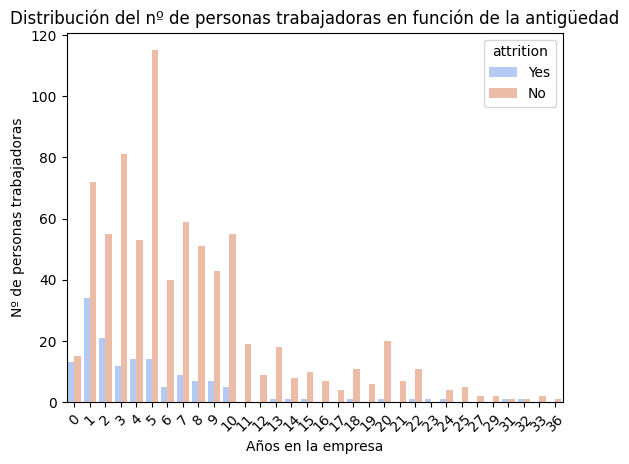

In [50]:
sns.countplot(x='yearsatcompany', data=df, palette = palettes , hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Años en la empresa")
plt.ylabel("Nº de personas trabajadoras")
plt.title('Distribución del nº de personas trabajadoras en función de la antigüedad')
plt.show()

In [ ]:
#La rotación (attrition = "Yes") es más alta entre empleados con poca antigüedad (0-5 años), especialmente en el primer año. A partir de los 6-7 años, la cantidad de personas que se van disminuye drásticamente, lo que sugiere que los empleados tienden a estabilizarse después de superar un período inicial de adaptación o evaluación. La mayoría de los empleados que permanecen están en el rango de 5 a 10 años.

In [52]:
print(df.columns.tolist())

['age', 'attrition', 'businesstravel', 'department', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'numcompaniesworked', 'overtime', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth', 'salary', 'remotework']


In [61]:
# Creamos la columna 'veterania' basada en 'yearsatcompany'
df['veterania'] = df['yearsatcompany'].apply(
    lambda x: '+ de 10 años' if x > 10 else '<= de 10 años'
)

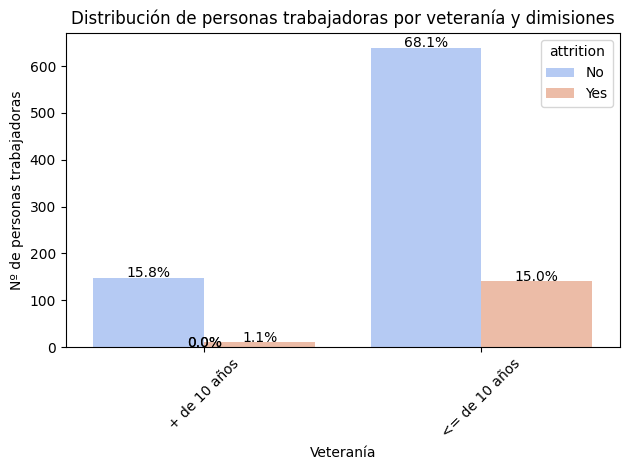

In [62]:
grafico = sns.countplot(x='veterania', data=df, palette=palettes, hue='attrition')

plt.xticks(rotation=45)
plt.xlabel("Veteranía")
plt.ylabel("Nº de personas trabajadoras")

total = len(df)
for p in grafico.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    grafico.text(
        p.get_x() + p.get_width() / 2, 
        height + 1,  # Ajuste para que no tape la barra
        percentage, 
        ha='center'
    )

plt.title("Distribución de personas trabajadoras por veteranía y dimisiones")
plt.tight_layout()
plt.show()

In [ ]:
#Esta gráfica confirma el patrón anterior: el 68% de los empleados con 10 años o menos de antigüedad siguen en la empresa, pero el 15% se han ido. En contraste, entre los empleados con más de 10 años, apenas el 1.1% ha dejado la empresa (y el 15.8% sigue activo). Esto indica que la lealtad y retención aumentan significativamente con la antigüedad, y que la mayor parte de la rotación ocurre en los primeros años.

In [ ]:
def grafico_pastel(df, columna, titulo):
    valores = df[columna].value_counts()
    plt.pie(valores, labels=valores.index, autopct="%1.1f%%", startangle=90)
    plt.title(titulo)
    plt.show()

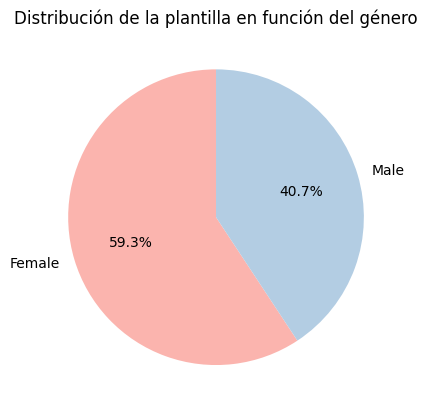

In [ ]:
grafico_pastel(df, 'gender', 'Distribución de la plantilla en función del género')

In [ ]:
#Como podemos observar en la gráfica, más de la mitad de la plantilla la componen mujeres.

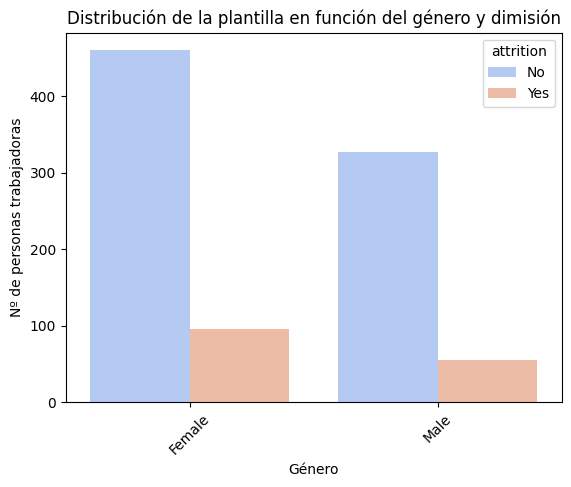

In [63]:
sns.countplot(x='gender', data=df, palette = palettes, hue = 'attrition')

plt.xticks(rotation=45)

plt.xlabel("Género")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del género y dimisión")

plt.show()

In [ ]:
#Hay más mujeres en la plantilla que hombres como se indicó anteriormente, y tanto mujeres como hombres muestran tasas de rotación similares en proporción (aproximadamente 20% de quienes se van, respecto al total de cada género). 
# Esto indica que no hay una diferencia significativa en la retención por género, lo cual es un buen indicador de equidad organizacional.

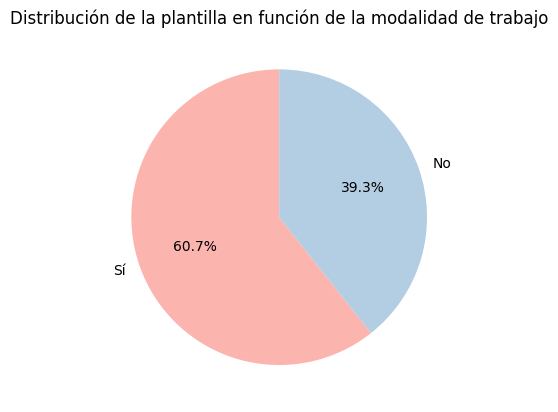

In [ ]:
grafico_pastel(df, 'remotework', 'Distribución de la plantilla en función de la modalidad de trabajo')

In [ ]:
#Casi el 61% de la plantilla trabaja de forma remota (“Sí”), lo que refleja una fuerte adopción del modelo flexible. 
# Dado que en otras gráficas se observa que la rotación no varía mucho entre modalidades, esto implica que el trabajo remoto está bien integrado y no genera inestabilidad por sí solo

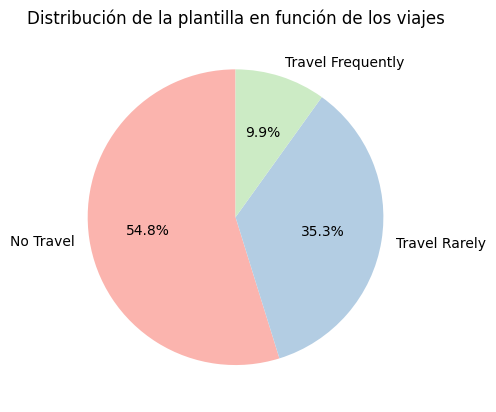

In [ ]:
grafico_pastel(df, 'businesstravel', 'Distribución de la plantilla en función de los viajes')

In [ ]:
#Casi un 5% más de la mitad de la plantilla no tiene ningún trabajo de negocios. En el lado opuesto, con menos de un 10% está la plantilla que viaja frecuentemente y poco más de un 35% viaja raramente.

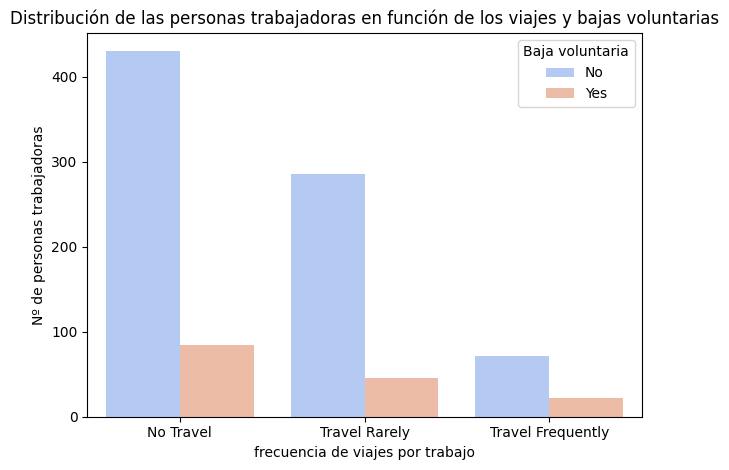

In [67]:
sns.countplot(x='businesstravel', hue='attrition', data=df, palette = palettes)
plt.title('Distribución de las personas trabajadoras en función de los viajes y bajas voluntarias')
plt.ylabel('Nº de personas trabajadoras')
plt.xlabel('frecuencia de viajes por trabajo')
plt.legend(title='Baja voluntaria')
plt.tight_layout()
plt.show()

In [ ]:
#Aunque hay un grupo significativo con baja satisfacción (nivel 1, más de 800 personas), la satisfacción aumenta progresivamente hacia los niveles 3 y 4. 
# Esto podría reflejar que, aunque muchos empleados no están completamente satisfechos con su rol, una buena parte sí lo está —y tal vez hay oportunidades para ajustar tareas o expectativas en los niveles bajos.

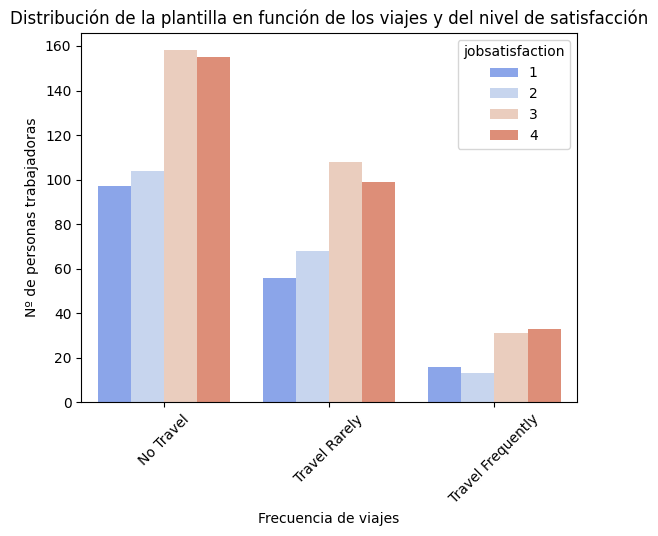

In [64]:
sns.countplot(x='businesstravel', data=df, palette = palettes4, hue = 'jobsatisfaction')

plt.xticks(rotation=45)

plt.xlabel("Frecuencia de viajes")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función de los viajes y del nivel de satisfacción")
plt.show()

In [ ]:
#Los empleados que no viajan son los más numerosos como se podía observar también en la gráfica anterior. También son los que reportan mayor satisfacción (alta proporción en nivel 4). 
# Quienes viajan raramente tienen una satisfacción moderada, mientras que quienes viajan frecuentemente son los menos numerosos y muestran la menor satisfacción general, aunque aún predominan los niveles 3 y 4. 
# Esto podría sugerir que los viajes frecuentes afectan negativamente la satisfacción, aunque no necesariamente causan deserción directamente.

In [ ]:
df_ylp_s = df.groupby("jobsatisfaction").agg({
    "employeenumber": "nunique",
    "yearssincelastpromotion": "mean"}).reset_index()
df_ylp_s

,jobsatisfaction,employeenumber,yearssincelastpromotion
0,1,169,2.242604
1,2,185,2.378378
2,3,297,2.033670
3,4,287,1.996516


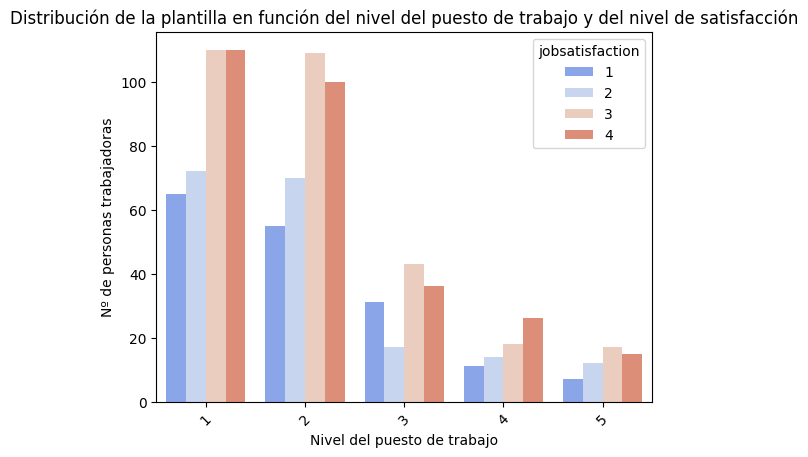

In [ ]:
sns.countplot(x='joblevel', data=df, palette = palettes4 , hue = 'jobsatisfaction')

plt.xticks(rotation=45)

plt.xlabel("Nivel del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del nivel del puesto de trabajo y del nivel de satisfacción")
plt.show()

In [ ]:
#A medida que aumenta el nivel del puesto de trabajo (de 1 a 5), disminuye el número total de empleados, lo cual es esperable. Sin embargo, también se observa que la satisfacción laboral tiende a ser más alta en niveles superiores: en los niveles 4 y 5, la mayoría de los empleados reporta satisfacción 4 (máxima). 
#En niveles bajos (1 y 2), hay una distribución más equilibrada, con muchos empleados reportando baja satisfacción (1 y 2)

In [ ]:
print(df.columns)   # ver si están jobrole y jobsatisfaction
print(df['jobrole'].unique()[:5])   # ver algunos valores
print(df['jobsatisfaction'].unique())

Index(['age', 'attrition', 'businesstravel', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel',
       'jobrole', 'jobsatisfaction', 'maritalstatus', 'numcompaniesworked',
       'overtime', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'datebirth', 'salary', 'remotework', 'veterania'],
      dtype='object')
['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Laboratory Technician']
[3 4 1 2]


In [ ]:
# Limpieza de la columna jobrole
df['jobrole'] = df['jobrole'].str.strip().str.title()

# Opcional: ver los valores únicos después de limpiar
print(df['jobrole'].unique())

['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Laboratory Technician' 'Research Scientist' 'Healthcare Representative'
 'Sales Representative' 'Human Resources']


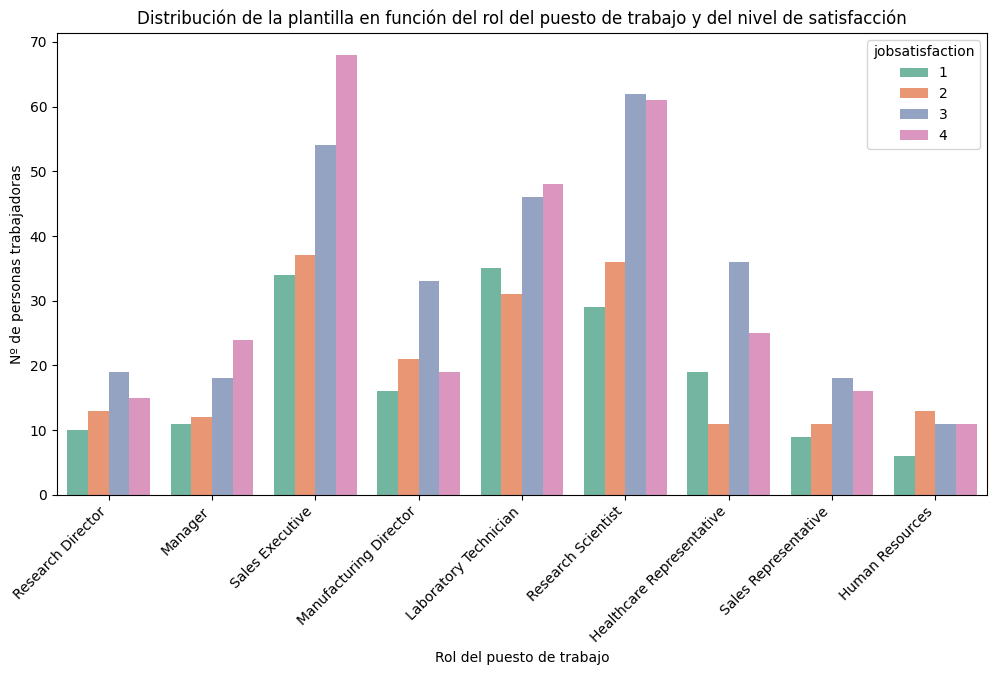

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='jobrole', data=df, hue='jobsatisfaction', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel("Rol del puesto de trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de la plantilla en función del rol del puesto de trabajo y del nivel de satisfacción")
plt.show()


In [ ]:
#En esta gráfica, hay variaciones importantes por rol. Por ejemplo, Sales Executive y Research Scientist tienen altos niveles de satisfacción 4, mientras que roles como Human Resources o Sales Representative muestran menor satisfacción promedio. 
# También se observa que en algunos roles (como Manufacturing Director) hay una concentración fuerte en satisfacción 4, mientras que en otros (como Healthcare Representative) la satisfacción está más dispersa. Esto sugiere que la satisfacción laboral varía considerablemente según el tipo de rol, posiblemente relacionado con autonomía, reconocimiento o carga de trabajo.

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\1407053645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


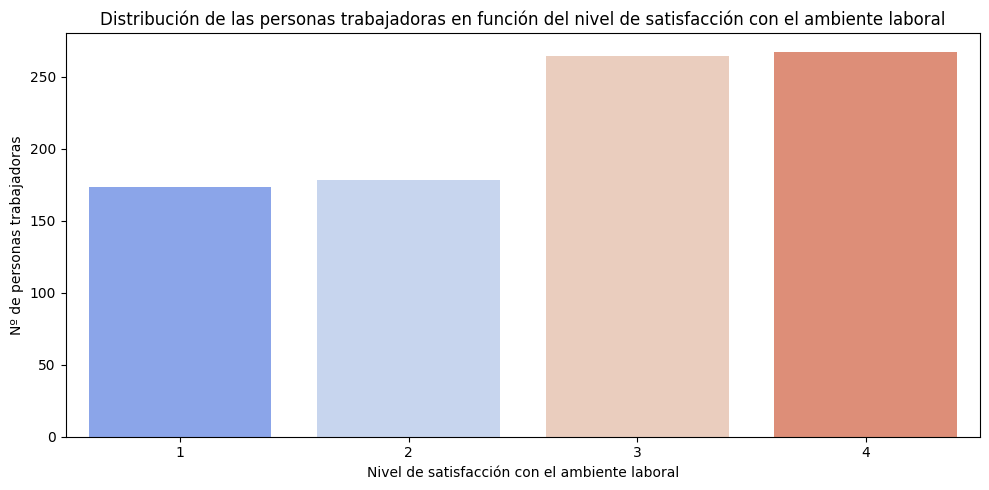

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    x="environmentsatisfaction",
    data=df,
    palette="coolwarm",
    order=["1", "2", "3", "4"]  
)
plt.xlabel("Nivel de satisfacción con el ambiente laboral")
plt.ylabel("Nº de personas trabajadoras")
plt.title("Distribución de las personas trabajadoras en función del nivel de satisfacción con el ambiente laboral")
plt.tight_layout()
plt.show()

In [ ]:
#La mayoría de los empleados reportan niveles altos de satisfacción (3 y 4), con un pico en el nivel 4. Solo una minoría (alrededor de 170 personas) reporta insatisfacción (nivel 1). 
# Esto sugiere que el clima organizacional general es positivo, aunque hay espacio para mejorar en aquellos que están menos satisfechos.

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\106927136.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobinvolvement",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\106927136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobinvolvement",


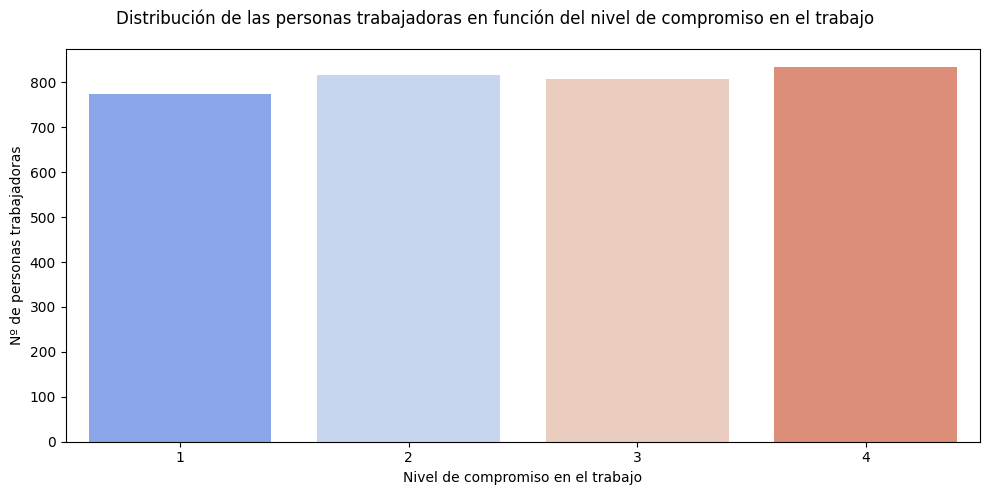

In [ ]:
orden_jobinvolvement = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobinvolvement", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de compromiso en el trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de compromiso en el trabajo")
plt.tight_layout()

In [ ]:
#El compromiso también se distribuye de forma favorable: la mayoría de los empleados tienen niveles altos (3 y 4), con un ligero aumento en el nivel 4. 
#Esto indica que la fuerza laboral está mayoritariamente comprometida, lo cual es un buen indicador de retención y productividad.

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\3582552254.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "relationshipsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\3582552254.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "relationshipsatisfaction",


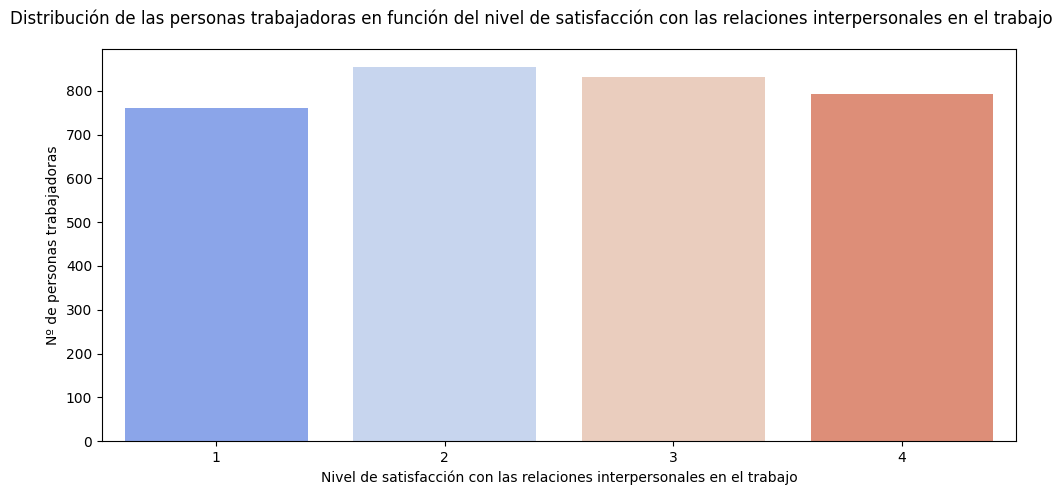

In [ ]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "relationshipsatisfaction", 
            y = "employeenumber", 
            data = df,
            ci = None,
            palette = "coolwarm",
            order = orden_jobinvolvement)
plt.xlabel("Nivel de satisfacción con las relaciones interpersonales en el trabajo")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de las personas trabajadoras en función del nivel de satisfacción con las relaciones interpersonales en el trabajo")
plt.tight_layout()

In [ ]:
#Similar al ambiente laboral, las relaciones interpersonales son percibidas positivamente por la mayoría, con una clara tendencia ascendente hacia el nivel 4. 
#Esto refuerza la idea de que el entorno social en el trabajo es un punto fuerte de la organización.

In [ ]:
# Se hacen agrupaciones en función de los niveles de satisfacción de distintas variables y su media salarial, para poder ver si el salario está relacionado con el nivel de satisfacción. 
df_sal_satis = df.groupby("environmentsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis

,environmentsatisfaction,salary
0,1,69617.425318
1,2,63585.741573
2,3,68002.329811
3,4,64924.469625
4,10,28111.130000
5,11,61167.055000
6,12,37947.782500
7,13,65475.330000
8,14,53914.110000
9,15,99850.000000


In [ ]:
df_sal_satis_2 = df.groupby("jobinvolvement").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_2

,jobinvolvement,salary
0,1,84918.587679
1,2,67624.023868
2,3,65054.438051
3,4,59251.624947


In [ ]:
df_sal_satis_3 = df.groupby("jobsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_3

,jobsatisfaction,salary
0,1,65238.235148
1,2,63563.077135
2,3,64991.199899
3,4,70103.763066


In [ ]:
df_sal_satis_4 = df.groupby("relationshipsatisfaction").agg({
    "salary": "mean"}).reset_index()
df_sal_satis_4

,relationshipsatisfaction,salary
0,1,60120.365579
1,2,66175.936813
2,3,65037.744508
3,4,72153.405129


C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\4032883066.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "jobsatisfaction",
C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\4032883066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "jobsatisfaction",


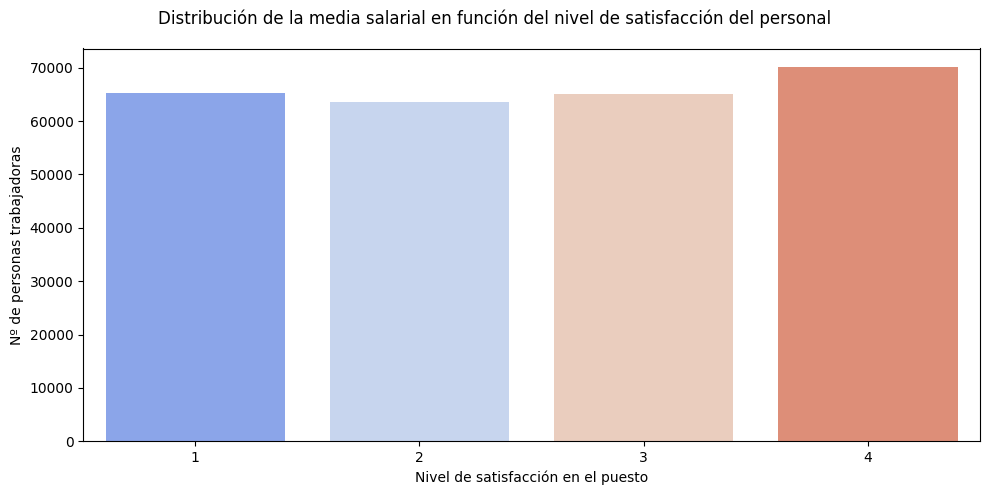

In [ ]:
orden_jobsatisfaction = ["1", "2", "3", "4"]
plt.figure(figsize=(10, 5)) 
sns.barplot(x = "jobsatisfaction", 
            y = "salary", 
            data = df_sal_satis_3,
            ci = None,
            palette = "coolwarm",
            order = orden_jobsatisfaction)
plt.xlabel("Nivel de satisfacción en el puesto")
plt.ylabel("Nº de personas trabajadoras")
plt.suptitle("Distribución de la media salarial en función del nivel de satisfacción del personal")
plt.tight_layout()

In [ ]:
#Aquí hay un hallazgo clave: a mayor satisfacción en el puesto, mayor es la media salarial, lo que sigue la tendencia más común en estos casos. Los empleados más satisfechos (nivel 4) tienen una media salarial cercana a los 70.000, mientras que los menos satisfechos (nivel 1) están en torno a 65.000. 
# Esto sugiere una correlación positiva entre remuneración y percepción de valor en el puesto, lo que podría indicar que el salario es un factor importante —pero no único— para la satisfacción laboral.

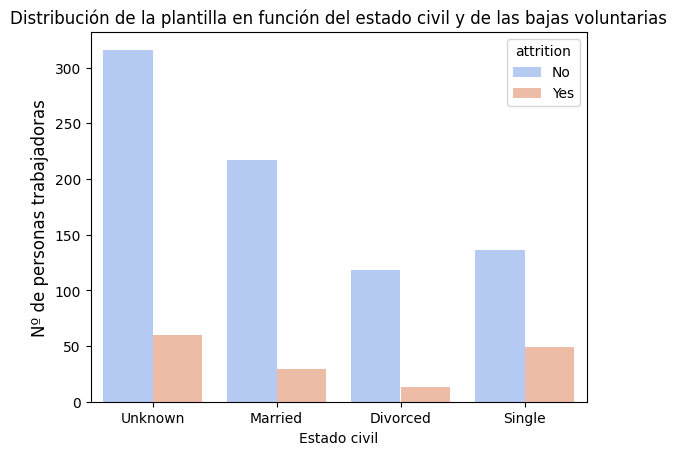

<Figure size 1200x600 with 0 Axes>

In [65]:
sns.countplot(data=df, x='maritalstatus', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del estado civil y de las bajas voluntarias')
plt.xlabel('Estado civil', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [ ]:
#Los empleados solteros y con estado civil “Unknown” tienden a tener más rotación voluntaria, mientras que los casados y divorciados muestran menor tasa de baja. 
# Esto podría sugerir que el estatus familiar puede influir en la estabilidad laboral, tal vez por mayores responsabilidades o necesidad de estabilidad

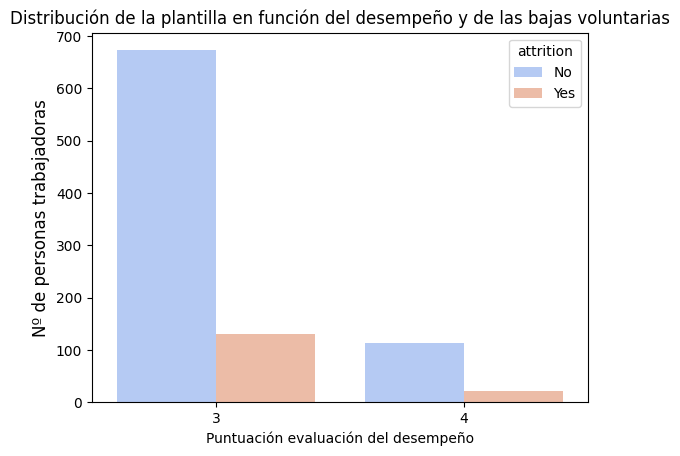

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.countplot(data=df, x='performancerating', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función del desempeño y de las bajas voluntarias')
plt.xlabel('Puntuación evaluación del desempeño', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.figure(figsize=(12, 6))  # Ancho x Alto
plt.tight_layout()  # <- evita que se corte el texto
plt.show()

In [ ]:
#La mayoría de los empleados con evaluación de desempeño 3 (la más común) permanecen en la empresa, pero también hay una cantidad significativa de rotación en este grupo. En cambio, quienes obtienen evaluación 4 (más altos) tienen muy baja rotación, lo que indica que el buen desempeño está fuertemente correlacionado con la retención.

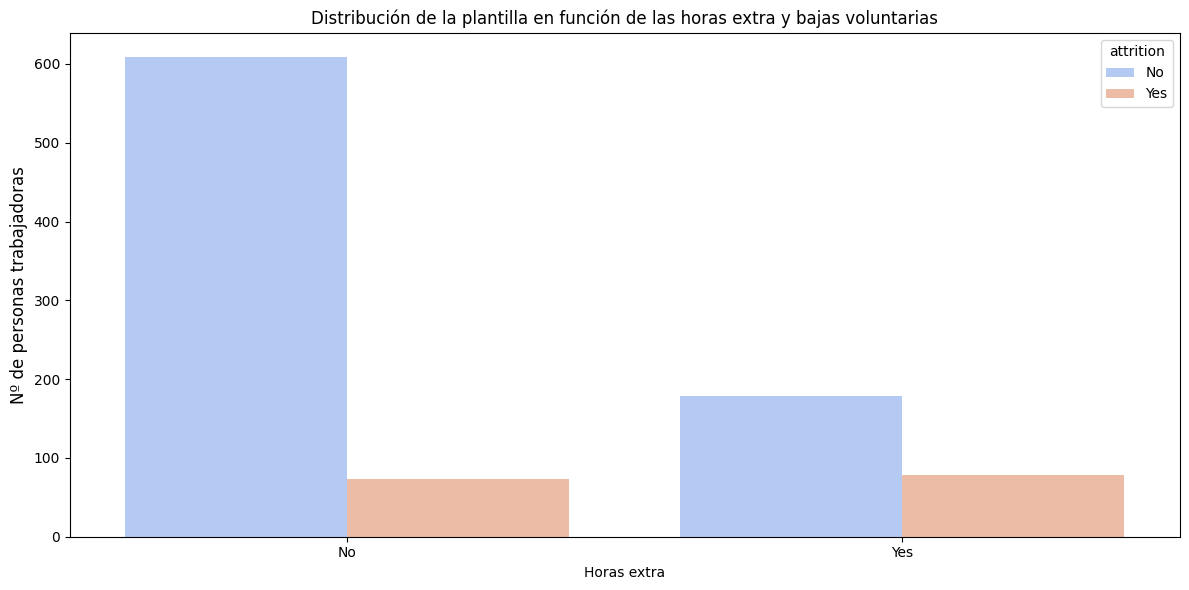

In [ ]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='overtime', hue='attrition', palette=palettes)
plt.title('Distribución de la plantilla en función de las horas extra y bajas voluntarias')
plt.xlabel('Horas extra', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.tight_layout() 
plt.show()

In [ ]:
#Aunque hay más empleados que no hacen horas extra, los que sí las hacen tienen una proporción relativamente alta de rotación. La última gráfica confirma esto: quienes trabajan horas extra tienen una tasa de rotación más alta (30%) que quienes no lo hacen (15%). 
# Esto sugiere que trabajar horas extra puede generar cansancio o descontento.

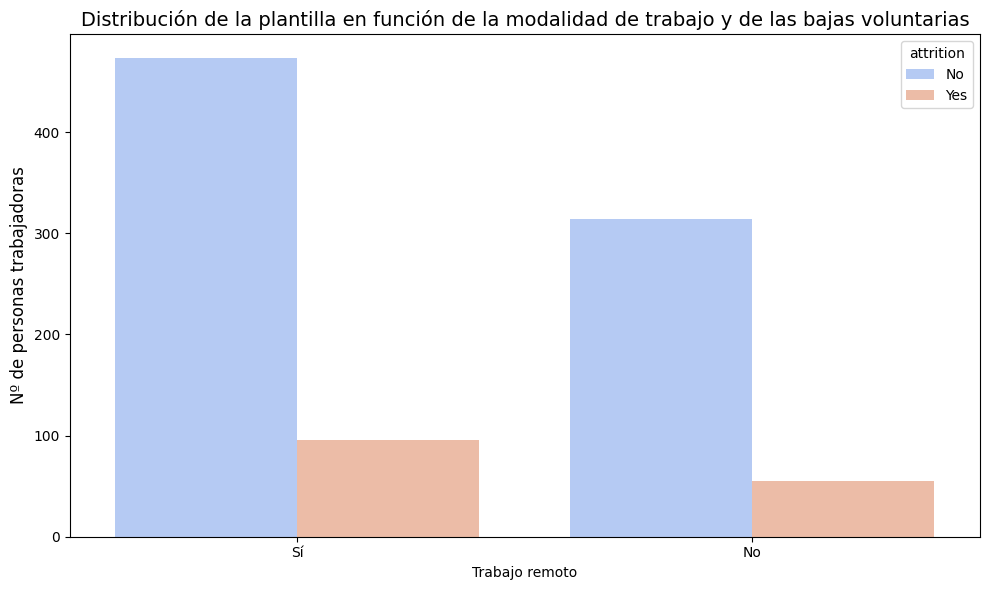

In [ ]:
plt.figure(figsize=(10, 6)) 
sns.countplot(data=df, x='remotework', hue='attrition', palette = palettes)
plt.title('Distribución de la plantilla en función de la modalidad de trabajo y de las bajas voluntarias', fontsize=14)
plt.xlabel('Trabajo remoto', fontsize=10)
plt.ylabel('Nº de personas trabajadoras', fontsize=12)
plt.tight_layout() 

plt.show()

In [ ]:
#Hay más empleados en modalidad remota, y aunque su tasa absoluta de rotación es mayor que la de presenciales, la proporción relativa de rotación es similar en ambos grupos (aproximadamente 20-25%). 
# Esto indica que el trabajo remoto no parece ser un factor determinante de rotación por sí solo, pero sí es importante monitorear el equilibrio entre productividad y bienestar en este grupo

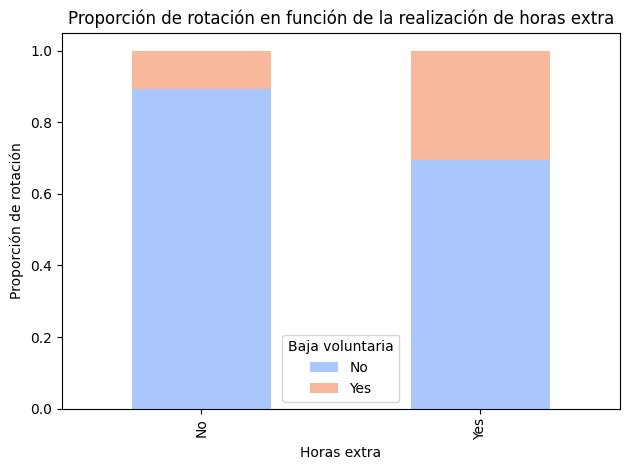

In [ ]:
prop_df = df.groupby('overtime')['attrition'].value_counts(normalize=True).unstack()
colores = sns.color_palette("coolwarm", n_colors=2)

# Gráfico
prop_df.plot(kind='bar', stacked=True, color=colores)
plt.title('Proporción de rotación en función de la realización de horas extra')
plt.ylabel('Proporción de rotación')
plt.xlabel('Horas extra')
plt.legend(title='Baja voluntaria')
plt.tight_layout()
plt.show()

In [ ]:
#Hacer horas extra está fuertemente asociado con mayor riesgo de rotación.
#Esto sugiere que, aunque puede ser necesario en ciertos momentos, si se vuelve habitual o no está bien compensada, puede generar desgaste, insatisfacción o desequilibrio laboral —factores clave para la decisión de dejar el trabajo.

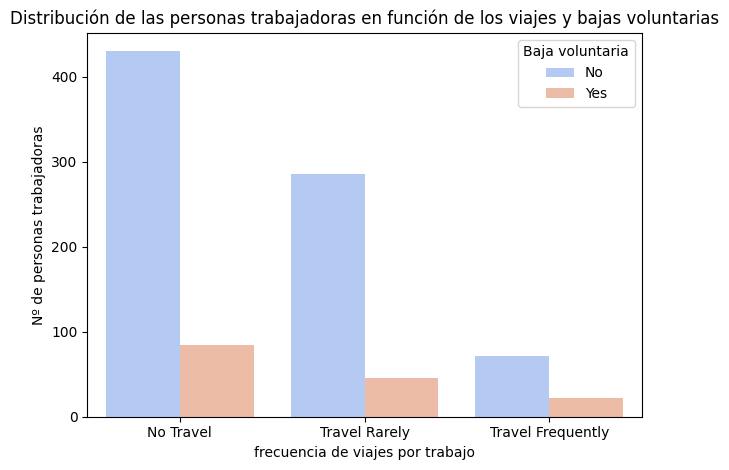

In [68]:
sns.countplot(x='businesstravel', hue='attrition', data=df, palette = palettes)
plt.title('Distribución de las personas trabajadoras en función de los viajes y bajas voluntarias')
plt.ylabel('Nº de personas trabajadoras')
plt.xlabel('frecuencia de viajes por trabajo')
plt.legend(title='Baja voluntaria')
plt.tight_layout()
plt.show()

In [ ]:
#Los empleados que no viajan tienen la mayor cantidad de rotaciones absolutas, pero también son el grupo más numeroso. 
#En cambio, quienes viajan frecuentemente tienen menos rotaciones en términos absolutos, pero una proporción relativamente alta (porque su grupo es más pequeño). 
#Esto indica que los viajes pueden ser un factor de estrés, aunque no necesariamente el principal motivo de rotación.

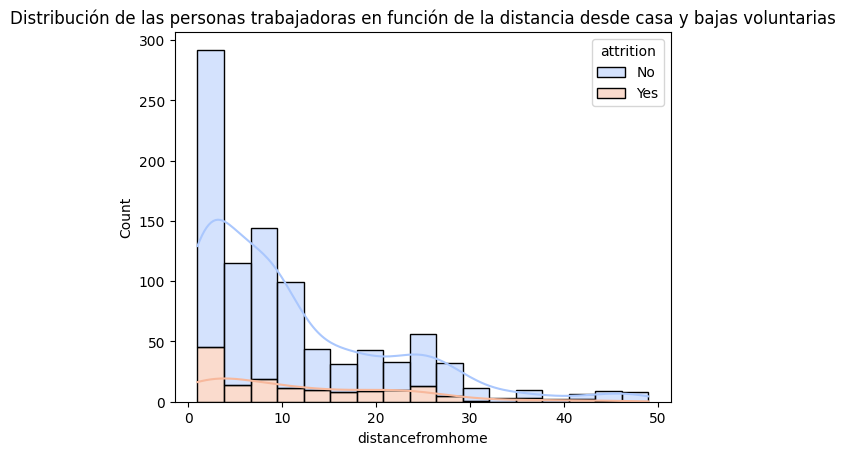

In [ ]:
sns.histplot(data=df, x='distancefromhome', hue='attrition', kde=True, multiple='stack', palette = palettes)
plt.title('Distribución de las personas trabajadoras en función de la distancia desde casa y bajas voluntarias')
plt.show()

In [ ]:
#La mayoría de los empleados viven cerca (0-10 km), y aunque hay rotación en ese rango, la tasa relativa de baja voluntaria es muy baja. 
#A medida que aumenta la distancia, disminuye el número total de empleados, pero la proporción de rotación no aumenta significativamente. 
# Esto sugiere que la distancia no es un factor clave de rotación en esta organización

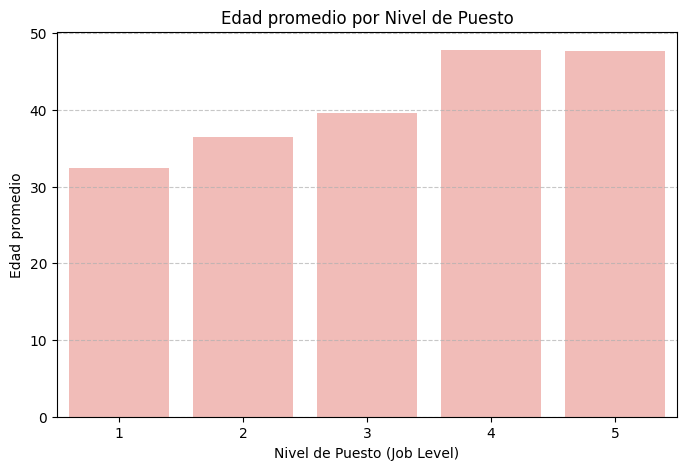

In [ ]:
# Calculamos la media de edad por joblevel
edad_promedio = df.groupby('joblevel', as_index=False)['age'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=edad_promedio, x='joblevel', y='age', errorbar=None)
plt.title('Edad promedio por Nivel de Puesto')
plt.xlabel('Nivel de Puesto (Job Level)')
plt.ylabel('Edad promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# A medida que aumenta el nivel de puesto (de 1 a 5), también aumenta la edad promedio de los empleados.
#Esto sugiere que, en general, los empleados con más experiencia (mayor edad) tienden a ocupar puestos de mayor nivel dentro de la empresa. Es una relación lógica y esperable: el ascenso suele venir con años de servicio y madurez profesional
#La gráfica refleja una relación positiva entre edad y nivel de puesto, lo cual es coherente con modelos tradicionales de carrera profesional

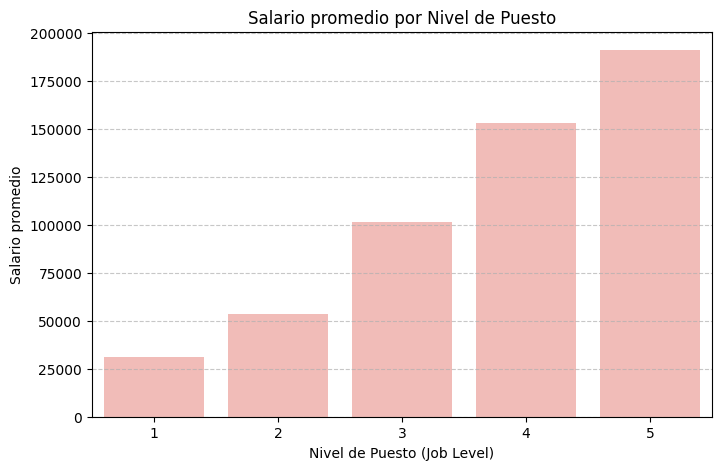

In [ ]:
# Calculamos el salario promedio por joblevel
salario_promedio = df.groupby('joblevel', as_index=False)['salary'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=salario_promedio, x='joblevel', y='salary', errorbar=None)
plt.title('Salario promedio por Nivel de Puesto')
plt.xlabel('Nivel de Puesto (Job Level)')
plt.ylabel('Salario promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#El salario promedio aumenta claramente conforme se sube de nivel de puesto.
#Por ejemplo, si el nivel 1 tiene un salario promedio de $40k y el nivel 5 llega a $90k, esto indica que la empresa recompensa el ascenso con incrementos salariales significativos.
# Hay una fuerte correlación positiva entre nivel de puesto y salario, lo que refuerza la idea de que el crecimiento profesional va acompañado de reconocimiento económico. Esto puede ser un factor motivador para la retención y el desarrollo interno

C:\Users\ReMarkt\AppData\Local\Temp\ipykernel_17860\2762613449.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anos_promedio = df.groupby('age_group', as_index=False)['yearsatcompany'].mean()


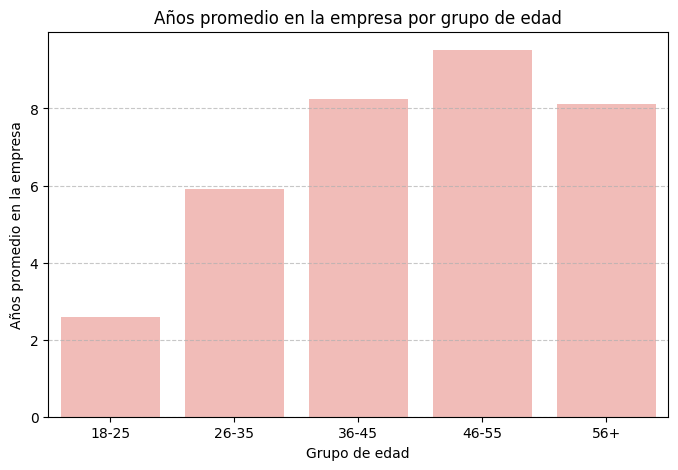

In [ ]:
# Creamos rangos de edad
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 100], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56+'])

# Calculamos años promedio por grupo
anos_promedio = df.groupby('age_group', as_index=False)['yearsatcompany'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(data=anos_promedio, x='age_group', y='yearsatcompany', errorbar=None)
plt.title('Años promedio en la empresa por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Años promedio en la empresa')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Los empleados más jóvenes (18-25) llevan menos tiempo en la empresa, mientras que los más mayores (46+) tienen muchos más años de antigüedad.
#Esto es totalmente esperable: los empleados más viejos han tenido más tiempo para acumular años en la compañía. También puede indicar baja rotación en la plantilla, ya que muchos empleados permanecen durante años
# Existe una relación positiva entre edad y antigüedad en la empresa, lo que sugiere estabilidad laboral y posiblemente una cultura de retención. Esto es un dato valioso para RRHH, ya que refleja lealtad y compromiso del personal.

Conclusión (basada en todos los análisis y los objetivos planteados):

Para reducir la rotación, recomendamos enfocarse en los empleados con poca antigüedad (especialmente el primer año) y en quienes realizan horas extra, ya que ambos grupos muestran tasas de baja voluntaria significativamente más altas. Además, aunque el trabajo remoto y el género no influyen negativamente, sí se debe controlar el equilibrio entre carga laboral y compensación.

Para mejorar la satisfacción en el trabajo, sugerimos fortalecer la alineación entre el rol, las expectativas y la remuneración, ya que existe una clara correlación entre salario y satisfacción en el puesto, así como optimizar las condiciones de los roles con menor satisfacción (como HR o Sales Representative). También es vital mantener el buen ambiente laboral y las relaciones interpersonales, aunque ya son puntos fuertes.

Los factores clave que influyen en desempeño y retención son:

✅ Alta evaluación de desempeño → mayor retención.

✅ Salario competitivo → mayor satisfacción y estabilidad.

❌ Horas extra → mayor riesgo de rotación.

✅ Buen ambiente y relaciones → alta satisfacción.

✅ Antigüedad >10 años → muy baja rotación.

Recomendación final:
Implementar programas de onboarding reforzado, revisar políticas de horas extras (con compensación o límites), y vincular mejor el desempeño con reconocimiento y recompensas salariales serán acciones estratégicas para lograr los tres objetivos: retener talento, aumentar la satisfacción y mejorar el desempeño general.